In [1]:
######################################################################################
# Using Electrodermal Activity to Detect Deception and Suspicion during a Card Game
# Affective Computing - Mini-project
# Jan Ondras
# Dec 2017 - Jan 2018
######################################################################################
##################################################################################
# Check event annotations and plot events and EDA together in one plot
##################################################################################

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Calculate difference between timestamp in string format and referenceTime
def timestamps_to_relative(timestamps, referenceTime=None):
    # Inputs are assumed to be strings of form %H:%M:%S.%f
    if referenceTime == None:
        referenceTime = datetime.strptime(timestamps[0], '%H:%M:%S.%f')
    else:
        referenceTime = datetime.strptime(referenceTime, '%H:%M:%S.%f')
    return [(datetime.strptime(x, '%H:%M:%S.%f')-referenceTime).total_seconds() for x in timestamps]

# Choose which game to check and consequently plot
# Game ID = SID of player 1 concatenated with SID of player 2
GID = '0708'
GID = '1718'
# GID = '1920'
# GID = '1314'
# GID = '0910'
# GID = '1516'
# GID = '1112'

# GID = '0102'
# GID = '0304'
# GID = '0506'


P1_SID =  GID[0:2]
P2_SID = GID[2:4]


# Load annotations
events_data = np.loadtxt('./../Experiment/AnnotatedEvents/G' + GID + '.csv', delimiter=",", skiprows=1, dtype=str)
events_data = events_data[:]

# Check annotations
for i, event in enumerate(events_data):
    if len(event[0]) == 8 and event[0][2] == ':' and event[0][5] == ':':
        events_data[i, 0] = events_data[i, 0] + '.000'
    elif len(event[0]) == 12 and event[0][2] == ':' and event[0][5] == ':' and event[0][8] == '.':
        pass
    elif event[1] == 'EOG':
        pass
    else:
        print "Timestamp format error ", event

    if i > 0 and len(events_data[i-1, 1]) == 12 and len(events_data[i, 1]) == 12:
        if events_data[i-1, 0] >= events_data[i, 0]:
            print "Timestamp increase error ", event
        
    if event[1] != 'D' and event[1] != 'S' and event[1] != 'EOG':
        print "Event type error in: ", event
        
    if event[1] == 'D' or event[1] == 'S':
        if event[4] not in ['S', 'D', 'H', 'C']:
            print "True suit error in: ", event
            
    if event[1] == 'D':
        if (event[2] in ['S', 'D', 'H', 'C']) and (event[3] == ''):
            if events_data[i-1, 1] == 'D' and events_data[i-1, 3] == '':
                print "Label error in prev: ", event
        elif (event[3] in ['S', 'D', 'H', 'C']) and (event[2] == ''):
            if events_data[i-1, 1] == 'D' and events_data[i-1, 2] == '':
                print "Label error in prev: ", event
        else:
            print "Label error in: ", event
            
    if event[1] == 'S':
        if (event[2] in ['CH']) and (event[3] == ''):
            if events_data[i-1, 3] == '':
                print "Label error before cheat: ", event
        elif (event[3] in ['CH']) and (event[2] == ''):
            if events_data[i-1, 2] == '':
                print "Label error before cheat: ", event
        else:
            print "Label error in: ", event          

print len(events_data[:, 0]) # including EOG
# Create timeline t of events excluding EOG
t = [x for x in events_data[:, 0] if len(x) == 12]
first_event_timestamp = t[0]
# Convert to relative times
t = timestamps_to_relative(t, first_event_timestamp)

P1_lied = P1_truth = P1_susp = 0.
P2_lied = P2_truth = P2_susp = 0.
events1 = []
events2 = []
for i, event in enumerate(events_data):
    if event[1] == 'D':
        if event[2] != '':
            events2.append(-1.)
            if event[2] == event[4]: # truth
                events1.append(2.)
                P1_truth += 1
            else:                    # deception
                events1.append(1.)
                P1_lied += 1
                
        elif event[3] != '':
            events1.append(-1.)
            if event[3] == event[4]: # truth
                events2.append(2.)
                P2_truth += 1
            else:                    # deception
                events2.append(1.)  
                P2_lied += 1
        else:
            print "Error! ", event
                
    elif event[1] == 'S':
        if event[2] == 'CH':
            events1.append(3.)
            events2.append(-1.)
            P1_susp += 1
        elif event[3] == 'CH':
            events2.append(3.)
            events1.append(-1.)
            P2_susp += 1
    else:
        print event[1]
print len(events1), len(events2), len(t), "\n"

# Calculate player stats:
print "P1: "
print "\t lied ", 100.*P1_lied/(P1_lied + P1_truth)," %"
print "\t was suspicious ", 100.*P1_susp/(P2_lied + P2_truth)," %"

print "P2: "
print "\t lied ", 100.*P2_lied/(P2_lied + P2_truth)," %"
print "\t was suspicious ", 100.*P2_susp/(P1_lied + P1_truth)," %"


186
EOG
185 185 185 

P1: 
	 lied  18.8405797101  %
	 was suspicious  37.9746835443  %
P2: 
	 lied  46.835443038  %
	 was suspicious  10.1449275362  %


<IPython.core.display.Javascript object>


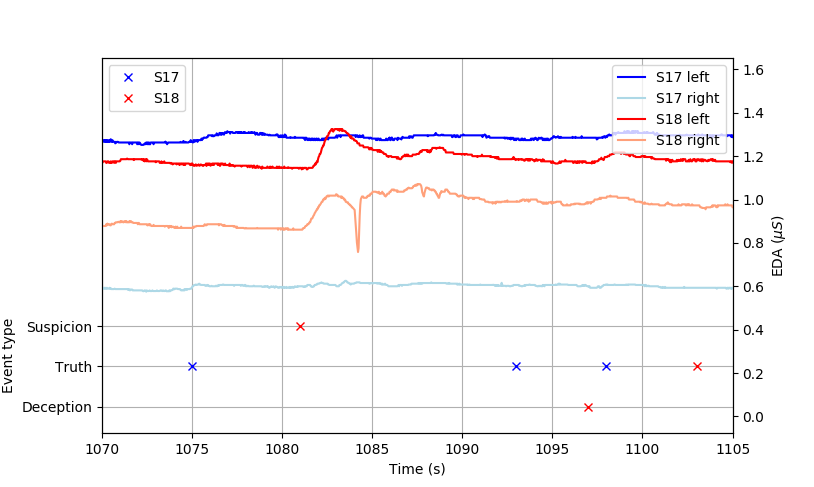

In [10]:
##################################################################################
# Plot events and EDA against time
##################################################################################

# Load EDA files: P1_EDA_L[:,[0,6]] contains [timestamp, EDA] pairs
P1_EDA_L = np.loadtxt('./../Experiment/EDA/S' + P1_SID + '_L.csv', delimiter=",", skiprows=8, dtype=str)
P1_EDA_R = np.loadtxt('./../Experiment/EDA/S' + P1_SID + '_R.csv', delimiter=",", skiprows=8, dtype=str)
P2_EDA_L = np.loadtxt('./../Experiment/EDA/S' + P2_SID + '_L.csv', delimiter=",", skiprows=8, dtype=str)
P2_EDA_R = np.loadtxt('./../Experiment/EDA/S' + P2_SID + '_R.csv', delimiter=",", skiprows=8, dtype=str)

%matplotlib notebook
plot_shift = 0.3 # To adjust vertical spacing between events in the plot
events1_plot=[]
for i, e in enumerate(events1):
    if e==2.:
        events1_plot.append( e-1+plot_shift )
    elif e==3.:
        events1_plot.append( e-2+2*plot_shift )
    elif e==1.:
        events1_plot.append( 1. )
    else:
        events1_plot.append( 0. )
events2_plot=[]
for i, e in enumerate(events2):
    if e==2.:
        events2_plot.append( e-1+plot_shift )
    elif e==3.:
        events2_plot.append( e-2+2*plot_shift )
    elif e==1.:
        events2_plot.append( 1. )
    else:
        events2_plot.append( 0. )

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(t, events1_plot, 'bx', label='S' + P1_SID)
ax1.plot(t, events2_plot, 'rx', label='S' + P2_SID)

ax2.plot(timestamps_to_relative(P1_EDA_L[:, 0], first_event_timestamp), P1_EDA_L[:, 6].astype(np.float32), '-',c='blue', label='S' + P1_SID + ' left')
ax2.plot(timestamps_to_relative(P1_EDA_R[:, 0], first_event_timestamp), P1_EDA_R[:, 6].astype(np.float32), '-',c='lightblue', label='S' + P1_SID + ' right')

ax2.plot(timestamps_to_relative(P2_EDA_L[:, 0], first_event_timestamp), P2_EDA_L[:, 6].astype(np.float32), '-',c='red', label='S' + P2_SID + ' left')
ax2.plot(timestamps_to_relative(P2_EDA_R[:, 0], first_event_timestamp), P2_EDA_R[:, 6].astype(np.float32), '-',c='lightsalmon', label='S' + P2_SID + ' right')


ax1.set_xlabel('Time (s)')
ax2.set_ylabel('EDA ($\mu S$)')#, color='b')
ax1.set_yticks([1., 1.+plot_shift, 1.+2*plot_shift])
ax1.set_yticklabels(['Deception', 'Truth', 'Suspicion'])
ax1.set_ylim([0.8, 3.6])
ax1.set_ylabel('Event type                                                  ')#, color='g')
# See specific interval
ax1.set_xlim([1070, 1105])
ax2.set_xlim([1070, 1105])

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid()
plt.show()